# Study 2: Railway Punctuality

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from scipy.stats import ttest_ind

In [356]:
import warnings
warnings.filterwarnings("ignore")

In [357]:
# path to Excel file
excel_file_path = 'table-3133-train-punctuality-at-recorded-station-stops-by-operator.xlsx'

# Specify the sheet name we are interested in
sheet_name = '3133_Punctuality_(quarterly)'

# Read the specified sheet into a pandas DataFrame
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

In [358]:
df.head()

,Time period,National or Operator,Number of recorded\nstation stops,Trains arriving within 59 seconds (percentage),Trains arriving within 3 minutes (percentage),Trains arriving within 15 minutes (percentage)
0,Apr to Jun 2014,Great Britain\n,1.652930e+07,67.822865,87.641925,99.025109
1,Jul to Sep 2014,Great Britain\n,1.679439e+07,65.612499,85.921171,98.833505
2,Oct to Dec 2014,Great Britain\n,1.618580e+07,58.653407,80.562318,98.382811
3,Jan to Mar 2015,Great Britain\n,1.626428e+07,65.632277,85.680608,98.831049
4,Apr to Jun 2015,Great Britain\n,1.666035e+07,67.509350,87.270642,98.964582


In [359]:
#See the shortened data
rows, columns = df.shape

# Print the number of rows and column
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 966
Number of columns: 6


## Research Question

Is there a statistically significant difference in the operators punctuality before and after covid-19 ?

### Justification

- The reported drop in schedule trains during the COVID-19 epidemic may have impacted punctuality.
(https://dataportal.orr.gov.uk/media/2165/passenger-performance-jul-sep-2022.pdf)
(https://assets.publishing.service.gov.uk/media/5fd0a1ebd3bf7f5d02b2195a/rail-factsheet-2020.pdf)
(https://www.oxfordmail.co.uk/news/national/19100431.train-punctuality-improvements-amid-fewer-services/)

### Data Wrangling

In [360]:
# Select relevant columns
selected_columns = ['Time period', 'National or Operator', 'Trains arriving within 59 seconds (percentage)']

In [361]:
punctuality = df[selected_columns]

In [362]:
#for visualization purpose
# Creating a copy of the DataFrame
punctuality_all = punctuality.copy()

In [363]:
punctuality.head()

,Time period,National or Operator,Trains arriving within 59 seconds (percentage)
0,Apr to Jun 2014,Great Britain\n,67.822865
1,Jul to Sep 2014,Great Britain\n,65.612499
2,Oct to Dec 2014,Great Britain\n,58.653407
3,Jan to Mar 2015,Great Britain\n,65.632277
4,Apr to Jun 2015,Great Britain\n,67.509350


Trains arriving within 59 seconds chosen because primary focus is on-time punctuality which is defined here(https://dataportal.orr.gov.uk/media/2165/passenger-performance-jul-sep-2022.pdf)

Before and after covid year selection are based on 
https://gds.blog.gov.uk/2022/07/25/2-years-of-covid-19-on-gov-uk/ 

In [364]:
# Extract the year from the 'Time period' and create 'Before' and 'After' columns
punctuality['Year'] = punctuality['Time period'].str.extract(r'(\d{4})')
punctuality['Before'] = (punctuality['Year'].astype(int) >= 2018) & (punctuality['Year'].astype(int) <= 2019)
punctuality['After'] = (punctuality['Year'].astype(int) >= 2021) & (punctuality['Year'].astype(int) <= 2022)[:-7]

In [365]:
# Filtering the dataframe based on 'Before' and 'After' columns
punctuality = punctuality[punctuality['Before'] | punctuality['After']]
# Resetting the index
punctuality.reset_index(drop=True, inplace=True)

In [366]:
punctuality.head()

,Time period,National or Operator,Trains arriving within 59 seconds (percentage),Year,Before,After
0,Jan to Mar 2018,Great Britain\n,62.330601,2018,True,False
1,Apr to Jun 2018,Great Britain\n,64.867350,2018,True,False
2,Jul to Sep 2018,Great Britain\n,63.178262,2018,True,False
3,Oct to Dec 2018,Great Britain\n,58.956295,2018,True,False
4,Jan to Mar 2019,Great Britain\n,66.952079,2019,True,False


In [367]:
# Create a 'Period' column
punctuality['Period'] = 'Before'
punctuality.loc[punctuality['Before'], 'Period'] = 'Before'
punctuality.loc[punctuality['After'], 'Period'] = 'After'

In [368]:
punctuality.head()

,Time period,National or Operator,Trains arriving within 59 seconds (percentage),Year,Before,After,Period
0,Jan to Mar 2018,Great Britain\n,62.330601,2018,True,False,Before
1,Apr to Jun 2018,Great Britain\n,64.867350,2018,True,False,Before
2,Jul to Sep 2018,Great Britain\n,63.178262,2018,True,False,Before
3,Oct to Dec 2018,Great Britain\n,58.956295,2018,True,False,Before
4,Jan to Mar 2019,Great Britain\n,66.952079,2019,True,False,Before


### Descriptive Statistics and Visualization

In [369]:
# Descriptive statistics
summary_stats = punctuality.groupby(['Before', 'After'])['Trains arriving within 59 seconds (percentage)'].describe()

In [370]:
summary_stats

,,count,mean,std,min,25%,50%,75%,max
Before,After,,,,,,,,
False,True,208.0,69.350105,11.511373,33.972136,61.461914,71.547419,78.214167,88.575266
True,False,208.0,60.737895,12.754902,29.180164,52.376738,62.800508,69.431254,86.488673


The degree of variability in punctuality scores is moderate, with a standard deviation of around 11.51% for after and 12.75% before recorded. 

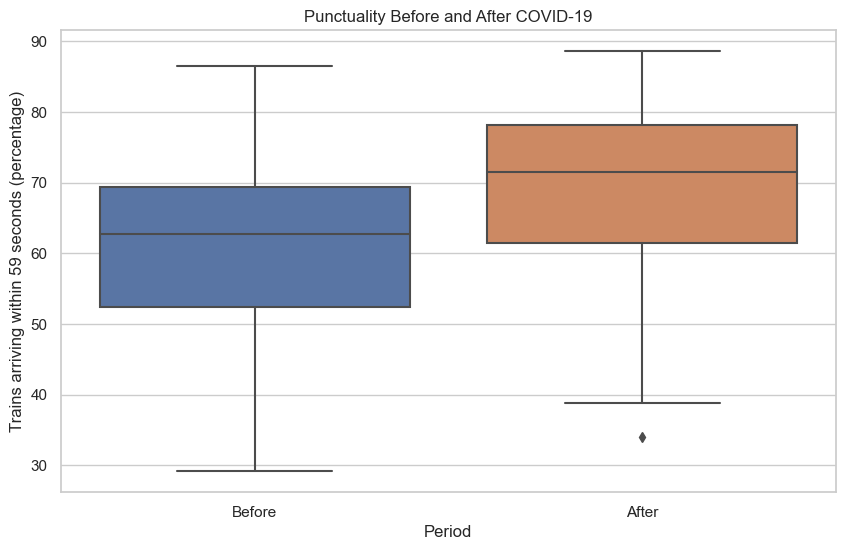

In [371]:
# Visualization - Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='Trains arriving within 59 seconds (percentage)', data=punctuality)
plt.title('Punctuality Before and After COVID-19')
plt.show()

A significant outlier originates from service interruptions or significant events like change in train schedule.

### On-Time Punctuality distributions for various operators

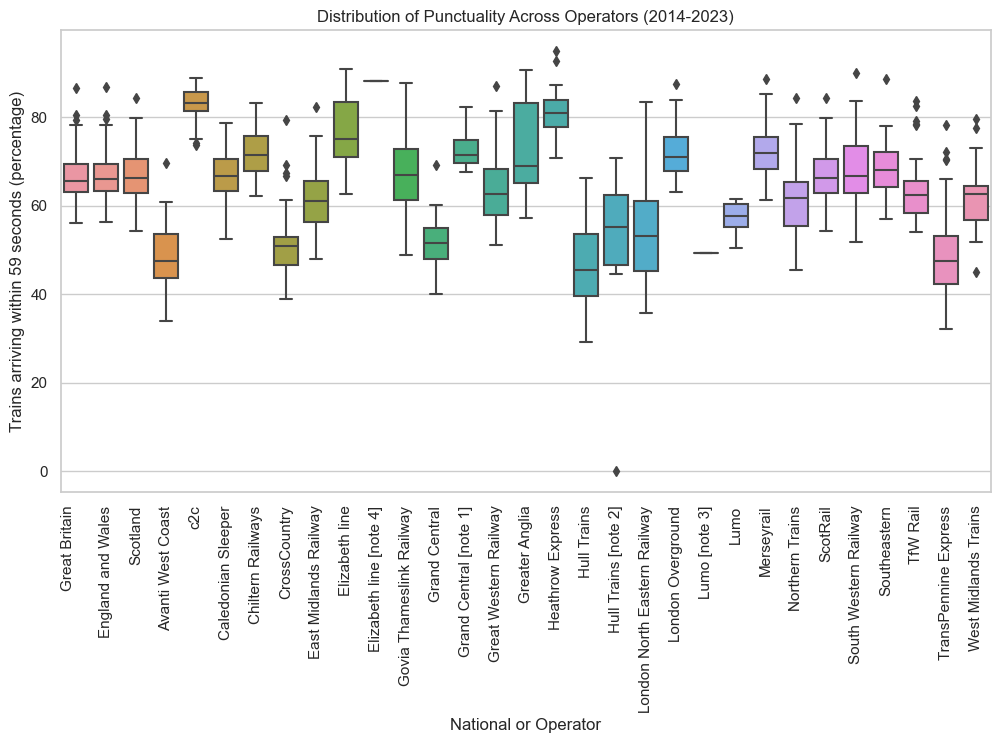

In [372]:
# seaborn for better visualization
sns.set(style="whitegrid")

# a boxplot to visualize the distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='National or Operator', y='Trains arriving within 59 seconds (percentage)', data=punctuality_all)
plt.xticks(rotation=90)
plt.title('Distribution of Punctuality Across Operators (2014-2023)')
plt.show()

Hull Trains[2] shows punctuality min zero which might indicate suspended services as mentioned in source file (table-3133-train-punctuality-at-recorded-station-stops-by-operator.xlsx).

### Frequency Distribution of On-Time Punctuality

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


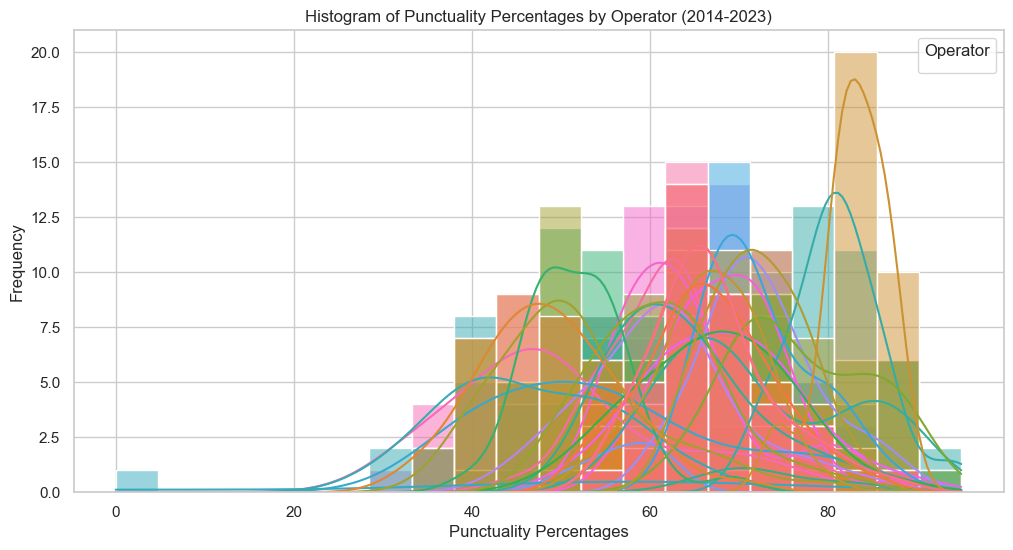

In [373]:
# Create histograms
plt.figure(figsize=(12, 6))
sns.histplot(punctuality_all, x='Trains arriving within 59 seconds (percentage)', hue='National or Operator', bins=20, kde=True)
plt.title('Histogram of Punctuality Percentages by Operator (2014-2023)')
plt.xlabel('Punctuality Percentages')
plt.ylabel('Frequency')
plt.legend(title='Operator')
plt.show()

A bar at 80-85% with a height of 20, it indicates that Operator had 20 instances of recording punctuality percentages within that specific range. 

## Hypothesis Test

#### Null Hypothesis (H0): There is no significant difference in the punctuality of operators before and after the COVID-19 pandemic.

#### Alternative Hypothesis (H1): There is a significant difference in the punctuality of operators before and after the COVID-19 pandemic.

### Paired Sample T-Test

In [374]:
# Perform paired sample t-test

t_statistic, p_value = ttest_rel(punctuality.loc[punctuality['After'], 'Trains arriving within 59 seconds (percentage)'],
                                punctuality.loc[punctuality['Before'], 'Trains arriving within 59 seconds (percentage)'])

# Print results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Set significance level
significance_level = 0.05

# Interpret results
if p_value < significance_level:
    print('Reject the null hypothesis. There is a significant difference in punctuality before and after COVID-19.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in punctuality before and after COVID-19.')


T-Statistic: 11.489621930825557
P-Value: 5.899030333358836e-24
Reject the null hypothesis. There is a significant difference in punctuality before and after COVID-19.


#### T-Statistic: 11.489621930825557

- Positive t-test indicates significant mean difference between the two groups, which shows on-time punctuality within 59 seconds in the "After" period higher compared to the "Before" period.

#### P-Value: 5.899030333358836e-24

- The null hypothesis is rejected because the p-value is less than 0.05, indicating a significant difference in punctuality.

### Result

Accepting the alternative hypothesis that there is a significant difference in the punctuality of operators before and after the COVID-19 pandemic.

### Top Performer

In [375]:
# Calculate mean punctuality for each operator before and after COVID-19
mean_punctuality = punctuality.groupby(['National or Operator', 'After'])['Trains arriving within 59 seconds (percentage)'].mean().reset_index()

# Pivot the table to have separate columns for before and after mean punctuality
mean_punctuality_pivot = mean_punctuality.pivot(index='National or Operator', columns='After', values='Trains arriving within 59 seconds (percentage)').reset_index()

# Calculate the change in punctuality
mean_punctuality_pivot['Punctuality Change'] = mean_punctuality_pivot[True] - mean_punctuality_pivot[False]

# Identify top performers
top_performers = mean_punctuality_pivot.sort_values(by='Punctuality Change', ascending=False).head(1)

In [376]:
top_performers

After,National or Operator,False,True,Punctuality Change
17,London North Eastern Railway,40.565883,67.145985,26.580102


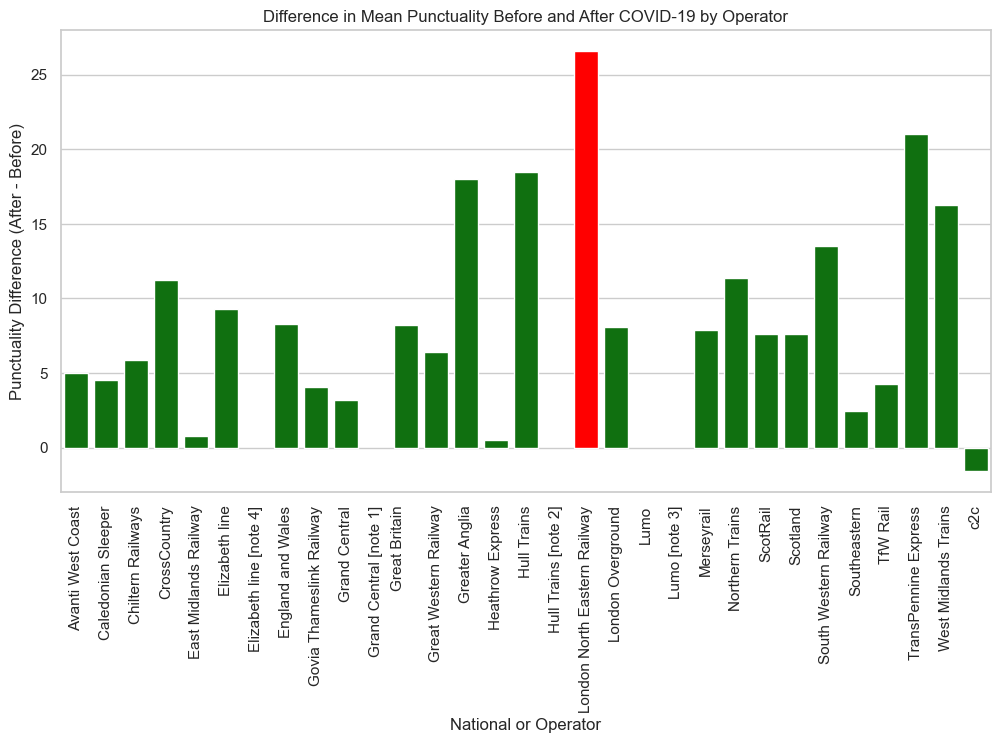

In [377]:
# Find the operator with the maximum punctuality difference
max_operator = mean_punctuality_pivot.loc[mean_punctuality_pivot['Punctuality Change'].idxmax(), 'National or Operator']

# Plot the difference with highlighting the highest bar
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='National or Operator', y='Punctuality Change', data=mean_punctuality_pivot, color='green')
highlight_index = mean_punctuality_pivot.index[mean_punctuality_pivot['National or Operator'] == max_operator][0]
barplot.patches[highlight_index].set_facecolor('red')  # Highlight the highest bar in red

plt.xlabel('National or Operator')
plt.ylabel('Punctuality Difference (After - Before)')
plt.title('Difference in Mean Punctuality Before and After COVID-19 by Operator')
plt.xticks(rotation=90)
plt.show()

LNER tops in improving its punctuality. For some operators, difference is not present showing the possibility of newly introduced services following COVID-19.

### Interpretation

- According to the study, a decline in train frequency and passenger numbers had a favourable impact on train operators punctuality. 

### Alignment with Literature

- The study findings are consistent with literature that emphasises the link between service demand, operational disturbances, and punctuality. 

### Reflection of Result

- The box plot's outliers, indicated possible disruptions or service outages during particular time.

### Project Implications

- LNER was found to be the top performer in the study.

### Limitation 

- Overlooked additional aspects of rail service performance due to its concentration on a particular period.

### Future Work

- Infrastructure, policies, location can help in better understanding of railway performance.

### Conclusion

- Study offers insightful information on railway punctuality during the Covid-19 epidemic.  
- The reduction in schedule trains and passangers during the pandemic highlightes complex interplay between external factors and transportation system performance.